<a href="https://colab.research.google.com/github/Kolawole-a2/Kola_Projects/blob/main/AFOLABI__Seas8416_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1a.** **Uploading the file (i.e. College.csv) to Colab:**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving College.csv to College.csv


**1b. Creating Subplots with Matplotlib**: I will create two subplots; a scatter plot and a histogram, using numerical features from the dataset.

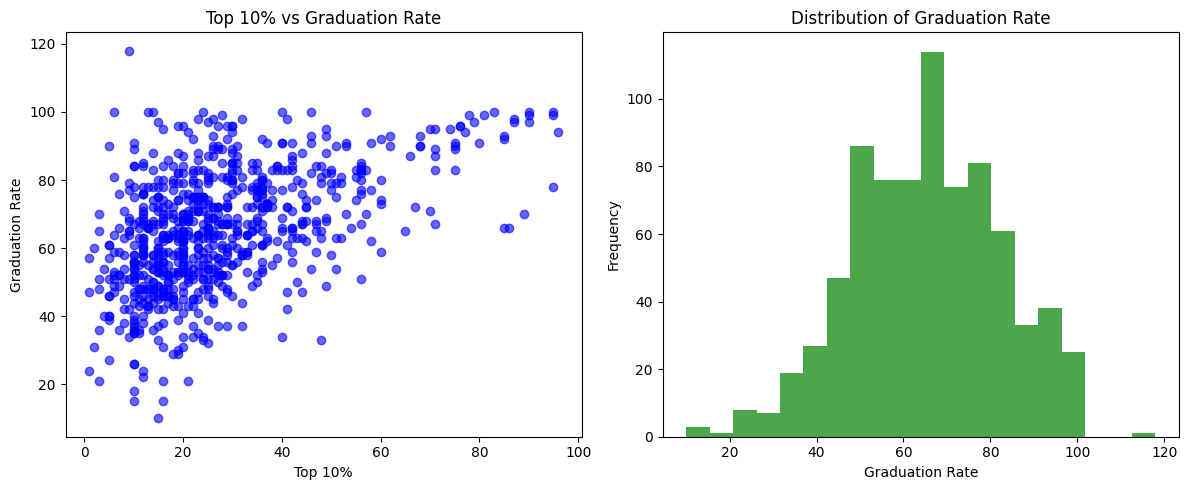

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('College.csv')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Top10perc vs. Grad.Rate
axes[0].scatter(df['Top10perc'], df['Grad.Rate'], color='blue', alpha=0.6)
axes[0].set_title('Top 10% vs Graduation Rate')
axes[0].set_xlabel('Top 10%')
axes[0].set_ylabel('Graduation Rate')

# Histogram: Distribution of Grad.Rate
axes[1].hist(df['Grad.Rate'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribution of Graduation Rate')
axes[1].set_xlabel('Graduation Rate')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


**2. Statistical Summary and Data Exploration**
a. Descriptive Statistics

In [3]:
# Descriptive statistics for numerical features
desc_stats = df.describe()
print(desc_stats)


               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

**b. Identify Categorical Features**

In [4]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)


Categorical Features: ['Unnamed: 0', 'Private']


**c. Checking for Missing Data**

In [5]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)


Missing Data:
 Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


**d. Distribution of 'Top10perc'**

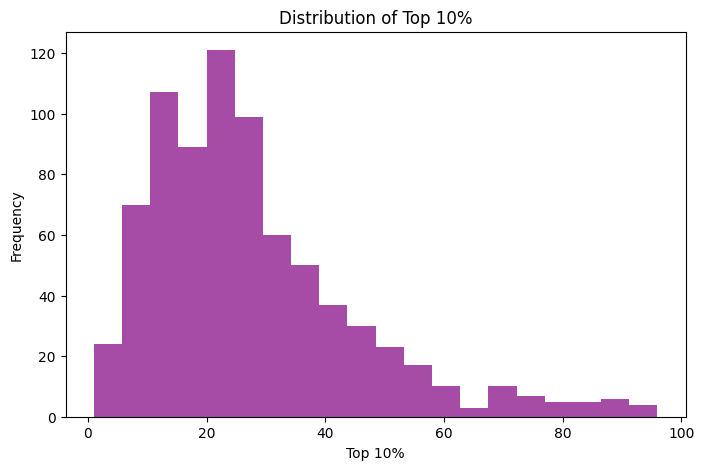

In [6]:
# Histogram of Top10perc
plt.figure(figsize=(8, 5))
plt.hist(df['Top10perc'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Top 10%')
plt.xlabel('Top 10%')
plt.ylabel('Frequency')
plt.show()


**3. Simple Linear Regression:**
This Will perform a simple linear regression with Top10perc as the independent variable and Grad.Rate as the dependent variable.

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Define independent variable (with constant) and dependent variable
X = sm.add_constant(df['Top10perc'])
y = df['Grad.Rate']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Model summary
print(model.summary())

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE
from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.4f}")


                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     184.7
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           5.35e-37
Time:                        18:01:29   Log-Likelihood:                -2580.8
No. Observations:                 621   AIC:                             5166.
Df Residuals:                     619   BIC:                             5174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.1632      1.148     45.431      0.0

**Interpretation:**
R-squared: Indicates the proportion of variance in the dependent variable explained by the independent variable. Closer to 1 means a better fit.

RMSE (Root Mean Squared Error): Measures the average magnitude of the errors between predicted and actual values. Lower values indicate better fit.

**Visualization:**

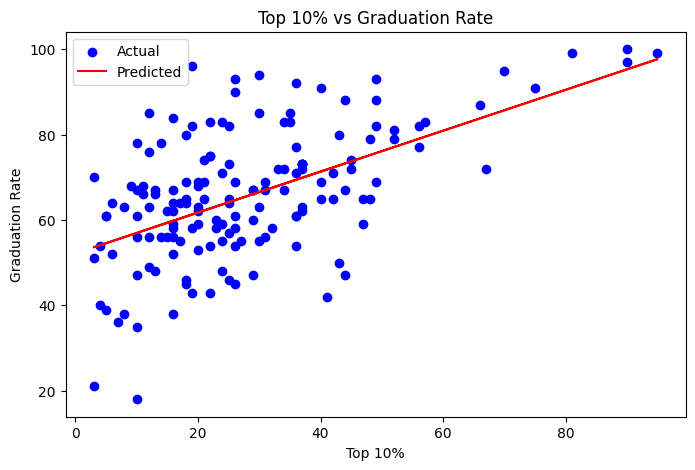

In [8]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test['Top10perc'], y_test, color='blue', label='Actual')
plt.plot(X_test['Top10perc'], y_pred, color='red', label='Predicted')
plt.title('Top 10% vs Graduation Rate')
plt.xlabel('Top 10%')
plt.ylabel('Graduation Rate')
plt.legend()
plt.show()
